## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [155]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [156]:
df = pd.read_csv('ab_data.csv')
#Show the first 5 rows
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [157]:
#Use df.shape to get the row and column number, the first number is the number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [158]:
#Count the unique value of column "user_id"
df.user_id.nunique()

290584

d. The proportion of users converted.

In [159]:
#Check the values of column 'converted'
df.converted.value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [160]:
# 'converted' only has 0 and 1 values, the average value of this column is the proportion
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [161]:
# the number of Group is treatment and page is not new_page
treat_old_no = df.query('group == "treatment" and landing_page != "new_page"').count()['user_id']
# the number of page is new_page and group is not treatment
nottreat_new_no= df.query('group != "treatment" and landing_page == "new_page"').count()['user_id']
# add the two number together
not_match = treat_old_no + nottreat_new_no
not_match


3893

f. Do any of the rows have missing values?

In [162]:
#sum the number of null values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [163]:
#I will use the rows that I fell confident. So I query out these rows
df2 = df.query('(group == "control" and landing_page == "old_page") or (group == "treatment" and landing_page == "new_page")')
df2.shape

(290585, 5)

In [164]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [165]:
#Count the unique value of column "user_id"
df2.user_id.nunique()

290584

In [166]:
#It has 290585 rows, means there is one duplicated user_id
df2.shape

(290585, 5)

b. There is one **user_id** repeated in **df2**.  What is it?

In [167]:
# Index to the duplicate user_id
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [168]:
#The duplicated user_id is 773192, query it out
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [169]:
#The two duplicated rows have the same content
df2.drop(1899,inplace = True)


In [170]:
df2.shape

(290584, 5)

In [171]:
#Check duplicated again
df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [172]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [173]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [174]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [175]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [176]:
(df['landing_page'] == 'new_page').mean()

0.5

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Base on the above results, sample size of each group is nearly the same, it seems that control group has a high convert rate than treatment group.**

**Till now I think there is not sufficient evdence to say the new treatment page leads to more conversions**

**First ,the probability show control group may has a higher convert rate**

**Second, I haven't consider other statistics indicators such as standard deviation**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**My null hypothese is**

$H_{0}$ : **$p_{old}$** - **$p_{new}$** >= 0

**So, the alternative hypothese is**

$H_{1}$ : **$p_{old}$** - **$p_{new}$** < 0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [177]:
#under the null, convert rate of both old and new is the same as in ab_data.csv
cr_total = df2.converted.mean()
cr_new = cr_total
cr_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [178]:
#is also the same
cr_old = cr_total
cr_old

0.11959708724499628

c. What is $n_{new}$?

In [179]:
#first separate df2 into two dataframs, one is control, one is treatment
df_new = df2.query('landing_page == "new_page"')
df_old = df2.query('landing_page == "old_page"')

#a sample size for each page equal to the ones in ab_data.csv
new_num = df_new.count()['user_id']
new_num

145310

d. What is $n_{old}$?

In [180]:
old_num = df_old.count()['user_id']
old_num

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [242]:
#Use np.random.choice to simulate draws, set the proporation to convert rate
new_page_converted = np.random.choice([0,1],size = new_num, p =[1-cr_new,cr_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [243]:
#Use np.random.choice to simulate draws, set the proporation to convert rate
old_page_converted = np.random.choice([0,1],size = old_num, p =[1-cr_old,cr_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [183]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.00021818016510798122

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [185]:
#simulate 10000 times
p_diffs = []
for _ in range(10000):
    new_page_conv = np.random.choice([0,1],size = new_num, p =[1-cr_new,cr_new])
    old_page_conv = np.random.choice([0,1],size = old_num, p =[1-cr_old,cr_old])
    diff = new_page_conv.mean() - old_page_conv.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'times')

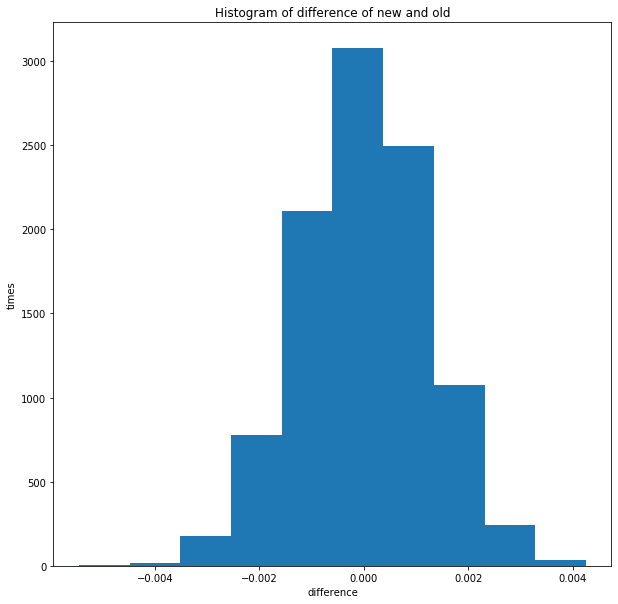

In [186]:
plt.figure(figsize = (10,10))
plt.hist(p_diffs)
plt.title('Histogram of difference of new and old')
plt.xlabel('difference')
plt.ylabel('times')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [187]:
# first figure out the actual difference in df2
diff_obs = df_new['converted'].mean() - df_old['converted'].mean()
print(diff_obs)
# get the p-value
p_diffs = np.asarray(p_diffs)

(p_diffs > diff_obs).mean()


-0.0015782389853555567


0.9032

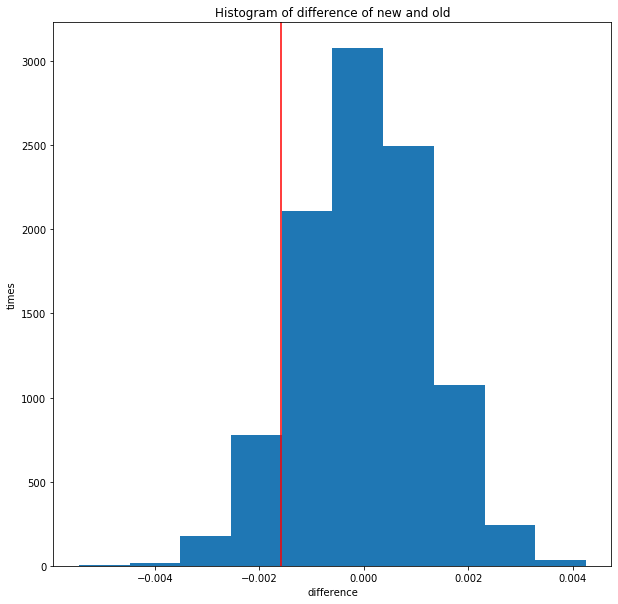

In [193]:
# show diff_obs in the hist chart
plt.figure(figsize = (10,10))
plt.hist(p_diffs)
plt.title('Histogram of difference of new and old')
plt.xlabel('difference')
plt.ylabel('times')
plt.axvline(x = diff_obs, c = 'r')

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**What I have just computed is called p-value, this value is 0.9056, means when null hypothesis is true, the total proportion of the actual observed difference (-0.00158) and all more extrame situation (> -0.00158) is 90.3%, which is much larger than Type I error rate of 5%. This means we can not reject the null hypothesis. so the new page and old page convertion rate have no significant difference**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [188]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [189]:
import statsmodels.api as sm

#get the number of conversions for each page
convert_old = df_old['converted'].sum()
convert_new = df_new['converted'].sum()

#get 
n_old = old_num
n_new = new_num

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [191]:
# set the parameter
count = np.array([convert_old,convert_new])
nobs = np.array([n_old,n_new])

# do a z_test, because alternative hypothesis is old page converted rate is less than new page, 
# I set the 'alternative' to 'smaller'
z_sco, p_val = sm.stats.proportions_ztest(count,nobs,alternative = 'smaller')
print(z_sco,p_val)


1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Base on the above calculation, I get the z-score is 1.31, and p-value is 0.95.**

**z-score is the number of standard deviation away from the mean. From the Z table, the probability corresponding to less than 1.31 is 0.9049. And is nearly the same as p-value.** 

**Base on the Type I error rate of 5%, if z-score is large than 1.65 (for one side test), I can reject the null hypothesis. My z-score is 1.31, so I can not reject the null hypothesis.**

**p-value is the total proportions of the observed value and all extreme situations if the null hypothesis is true. If p-value is less than Type I error rate, I can reject the null hypothesis.**

**The same as the above, p-value is much higher than 5%, I also can not reject the null hypothesis**

**From the z test, the result is the same as what I found in parts j and k, they all indicate I can not reject the null hypothesis. That means there is no evidence showing new page and old page has any difference.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since the result has only two possibilities, I can only use the Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [196]:
# creat a dummy column to save the group value (1 when treatment and 0 if control)
df2[['temp','ab_page']] = pd.get_dummies(df2['group'])
df2['intercept'] = 1
df2.head()

/Users/xuhao3/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,timestamp,group,landing_page,converted,temp,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [197]:
#drop the temp column
df2.drop('temp',axis = 1,inplace= True)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [199]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [200]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Dec 2019   Pseudo R-squ.:               8.077e-06
Time:                        22:51:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [227]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [229]:
1 /np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

**From the result, when in the treatment group, we expect a multiplicative change in the odd of convertion of 0.985 time to the control group.**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value here is associated with the null hypothesis that ab_page's coefficient is equal to 0. The p-value from part II is associated with the null hypothesis that new page and old page has no difference. Both p-values have different meanings.**

**The p-value here is 0.19, is much higher than 5%, I can not reject the null hypothesis, means ab_page can not explain the result well.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**If the data we get can not interprate the result, if possible we need to consider adding other factors to our regression model.**

**But we need to be very careful, for adding new data may have several disadvantages, like we don't konw the quality of the new data, we may adding some unrelated data, and also may lead to problems such as multicollinearity**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [207]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [208]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [204]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [209]:
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

In [210]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [238]:
logit_mod2 = sm.Logit(df_new['converted'],df_new[['intercept','CA','US']])
results2 = logit_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 14 Dec 2019   Pseudo R-squ.:               1.521e-05
Time:                        00:01:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

In [239]:
np.exp(results2.params)

intercept    0.137132
CA           0.950546
US           0.990133
dtype: float64

**From the result, when in the CA, we expect a multiplicative change in the odd of convertion of 0.95 time (5% less) to the odd in UK. The p-value of CA's coefficient is 7.4% and is between 5% and 10%, it seems that if we set the type I error rate to 10%, CA's coefficient is difficient from 0.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [240]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,ab_page_CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0


In [241]:
logit_mod3 = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','ab_page_CA']])
results3 = logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 14 Dec 2019   Pseudo R-squ.:               2.567e-05
Time:                        00:08:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1409
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9880      0.008   -240.457      0.000      -2.004      -1.972
ab_page       -0.0123      0.012     -1.049      0.294      -0.035       0.011
CA            -0.0160      0.037     -0.429      0.668      -0.089       0.057
ab_page_CA    -0.0552      0.053     -1.034      0.301      -0.160       0.049
==============================================================================
"""

At last I want to look into the time column

In [246]:
df_new['timestamp'].max(),df_new['timestamp'].min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

In [281]:
df_new['hour'] = pd.DatetimeIndex(df_new['timestamp']).hour
df_new

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,ab_page_CA,norm_timestamp,hour
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,2017-01-14,23
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,2017-01-23,14
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,2017-01-16,14
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,2017-01-22,3
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,2017-01-16,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,0,1,0,0,1,0,2017-01-09,3
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,0,1,0,1,0,0,2017-01-05,15
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,0,1,0,1,0,0,2017-01-09,18


In [282]:
df_new.groupby('hour')['converted'].mean()

hour
0     0.120339
1     0.113714
2     0.113339
3     0.115007
4     0.114126
5     0.120905
6     0.121330
7     0.117589
8     0.118457
9     0.125198
10    0.117579
11    0.122810
12    0.123908
13    0.120599
14    0.118018
15    0.121179
16    0.117450
17    0.122183
18    0.126586
19    0.117099
20    0.118437
21    0.120674
22    0.119527
23    0.124401
Name: converted, dtype: float64

In [273]:
def day_and_night(hour):
    if int(hour) >= 8 and int(hour) < 20:
        return 0
    else:
        return 1

df_new.hour = df_new.hour.apply(day_and_night)

In [275]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,ab_page_CA,norm_timestamp,hour
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,2017-01-14,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,2017-01-23,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,2017-01-16,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,2017-01-22,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,2017-01-16,0


In [279]:
df_new.query('hour == 1')['converted'].mean()

0.1182790515086192

In [280]:
df_new.query('hour == 0')['converted'].mean()

0.12091343673693986

In [276]:
logit_mod6 = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','hour']])
results6 = logit_mod6.fit()
results6.summary()


Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 15 Dec 2019   Pseudo R-squ.:               3.059e-05
Time:                        22:54:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.03859
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9763      0.010   -200.599      0.000      -1.996      -1.957
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
hour          -0.0250      0.011     -2.189      0.029      -0.047      -0.003
==============================================================================
"""

In [277]:
np.exp(results6.params)

intercept    0.138578
ab_page      0.985111
hour         0.975283
dtype: float64

In [252]:
df_new['norm_timestamp'] = pd.DatetimeIndex(df_new.timestamp).normalize()

In [253]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,ab_page_CA,norm_timestamp
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,2017-01-14
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,2017-01-23
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,2017-01-16
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,2017-01-22
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,2017-01-16


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.